# Task 4: Insights and Recommendations

This notebook focuses on deriving actionable insights from the sentiment and thematic analysis of bank reviews, creating visualizations, and formulating recommendations for app improvements.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Ensure plots are displayed inline in Jupyter
%matplotlib inline

## Load Processed Data

We will load the combined sentiment and thematic analysis results from Task 2 (`bank_reviews_with_sentiment_and_themes.csv`).

In [2]:
input_path = '../data/bank_reviews_with_sentiment_and_themes.csv'
assert os.path.exists(input_path), f'Error: Input file not found at {input_path}'
df = pd.read_csv(input_path)
df.head()

,review_id,review_text,sentiment_label,sentiment_score,identified_theme(s),rating,date,bank,source
0,1,really am happy to this app it is Siple to use...,POSITIVE,0.998870,User Interface & Experience,5,2025-06-07,Commercial Bank of Ethiopia,Google Play
1,2,I liked this app. But the User interface is ve...,NEGATIVE,-0.999684,User Interface & Experience,2,2025-06-07,Commercial Bank of Ethiopia,Google Play
2,3,"""Why don’t your ATMs support account-to-accoun...",NEGATIVE,-0.996465,"Transaction Performance, Customer Support",4,2025-06-06,Commercial Bank of Ethiopia,Google Play
3,4,what is this app problem???,NEGATIVE,-0.999623,User Interface & Experience,1,2025-06-05,Commercial Bank of Ethiopia,Google Play
4,5,the app is proactive and a good connections.,POSITIVE,0.999868,User Interface & Experience,5,2025-06-05,Commercial Bank of Ethiopia,Google Play


## Sentiment Analysis Insights

We'll start by visualizing the overall sentiment distribution and then break it down by bank and rating to identify general satisfaction levels and potential areas of concern.

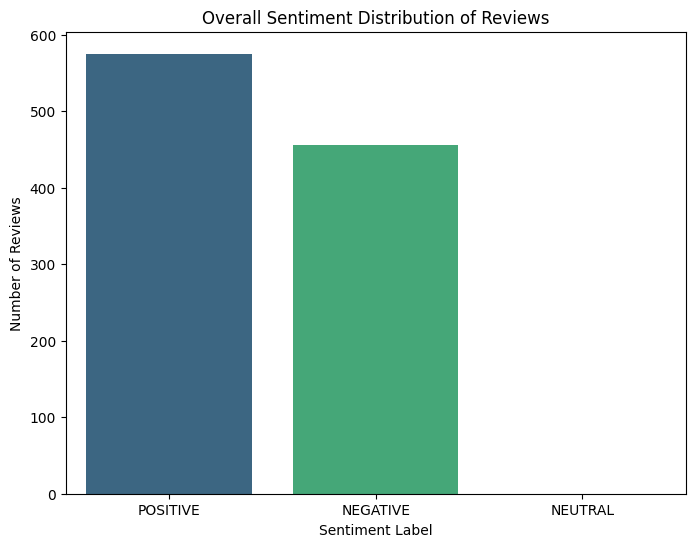

Overall Sentiment Counts:
sentiment_label
POSITIVE    575
NEGATIVE    456
Name: count, dtype: int64


In [4]:
# Visualize overall sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis',
              order=['POSITIVE', 'NEGATIVE', 'NEUTRAL'],
              hue='sentiment_label', legend=False) # <--- Updated lines
plt.title('Overall Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.show()

# Print counts for more detail
print("Overall Sentiment Counts:")
print(df['sentiment_label'].value_counts())

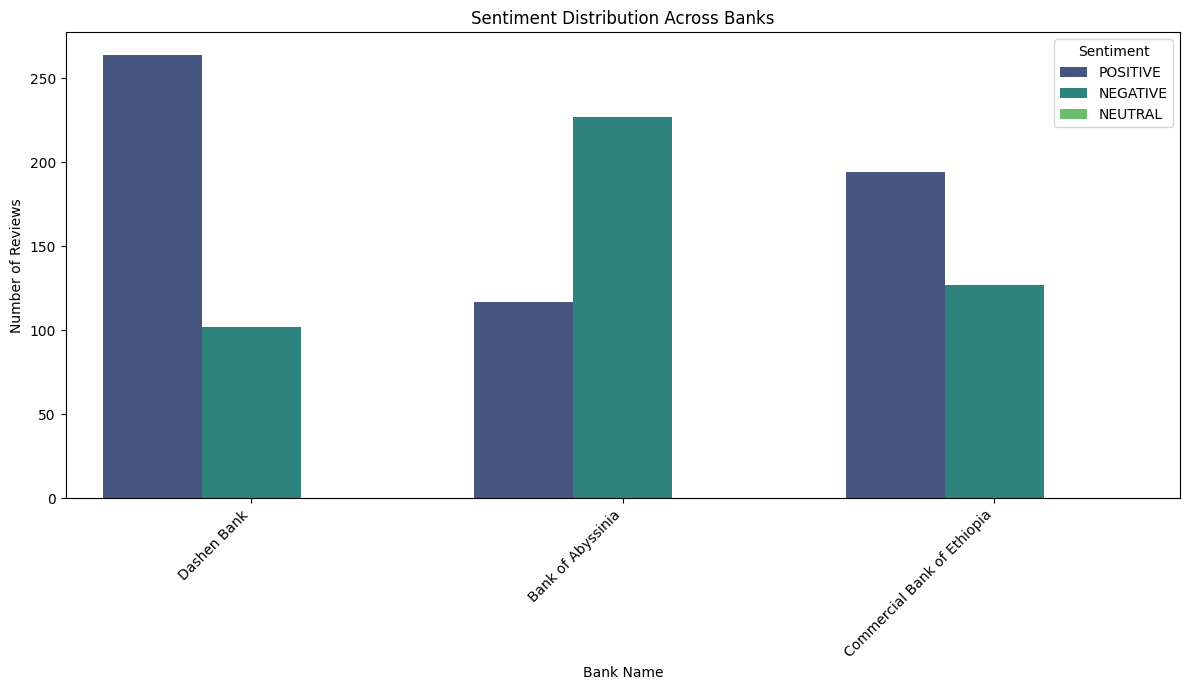


Mean Sentiment Score by Bank:
bank
Dashen Bank                    0.451392
Commercial Bank of Ethiopia    0.220700
Bank of Abyssinia             -0.296761
Name: sentiment_score, dtype: float64


In [5]:
# Visualize sentiment distribution per bank
plt.figure(figsize=(12, 7))
sns.countplot(x='bank', hue='sentiment_label', data=df, palette='viridis',
              order=df['bank'].value_counts().index,
              hue_order=['POSITIVE', 'NEGATIVE', 'NEUTRAL'])
plt.title('Sentiment Distribution Across Banks')
plt.xlabel('Bank Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Aggregate mean sentiment score by bank
print("\nMean Sentiment Score by Bank:")
print(df.groupby('bank')['sentiment_score'].mean().sort_values(ascending=False))

## Thematic Analysis Insights

Now, let's explore the identified themes to pinpoint common drivers of satisfaction and pain points across all reviews and for individual banks.

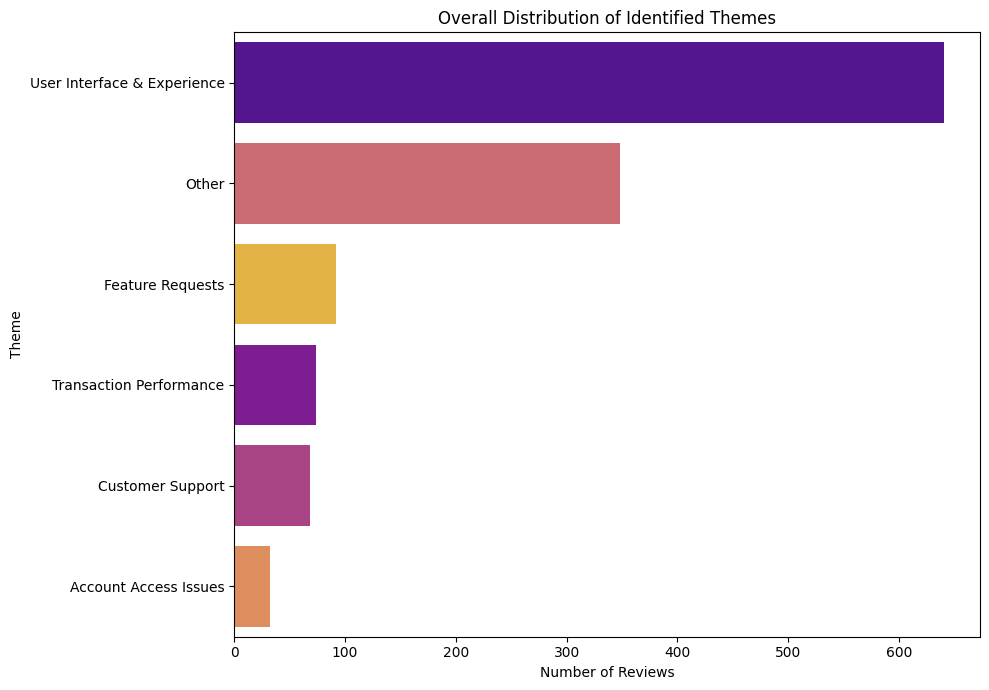


Overall Theme Counts:
identified_theme(s)
User Interface & Experience    641
Other                          348
Feature Requests                92
Transaction Performance         74
Customer Support                68
Account Access Issues           32
Name: count, dtype: int64


In [8]:
# Explode the 'identified_theme(s)' column to count individual themes
themes_exploded = df['identified_theme(s)'].str.split(', ').explode()

plt.figure(figsize=(10, 7))
sns.countplot(y=themes_exploded, order=themes_exploded.value_counts().index, palette='plasma',
              hue=themes_exploded, legend=False) # <--- Updated lines
plt.title('Overall Distribution of Identified Themes')
plt.xlabel('Number of Reviews')
plt.ylabel('Theme')
plt.tight_layout()
plt.show()

print("\nOverall Theme Counts:")
print(themes_exploded.value_counts())

## Theme Distribution by Bank

Understanding which themes are most prevalent for each specific bank helps in identifying their unique strengths and weaknesses.

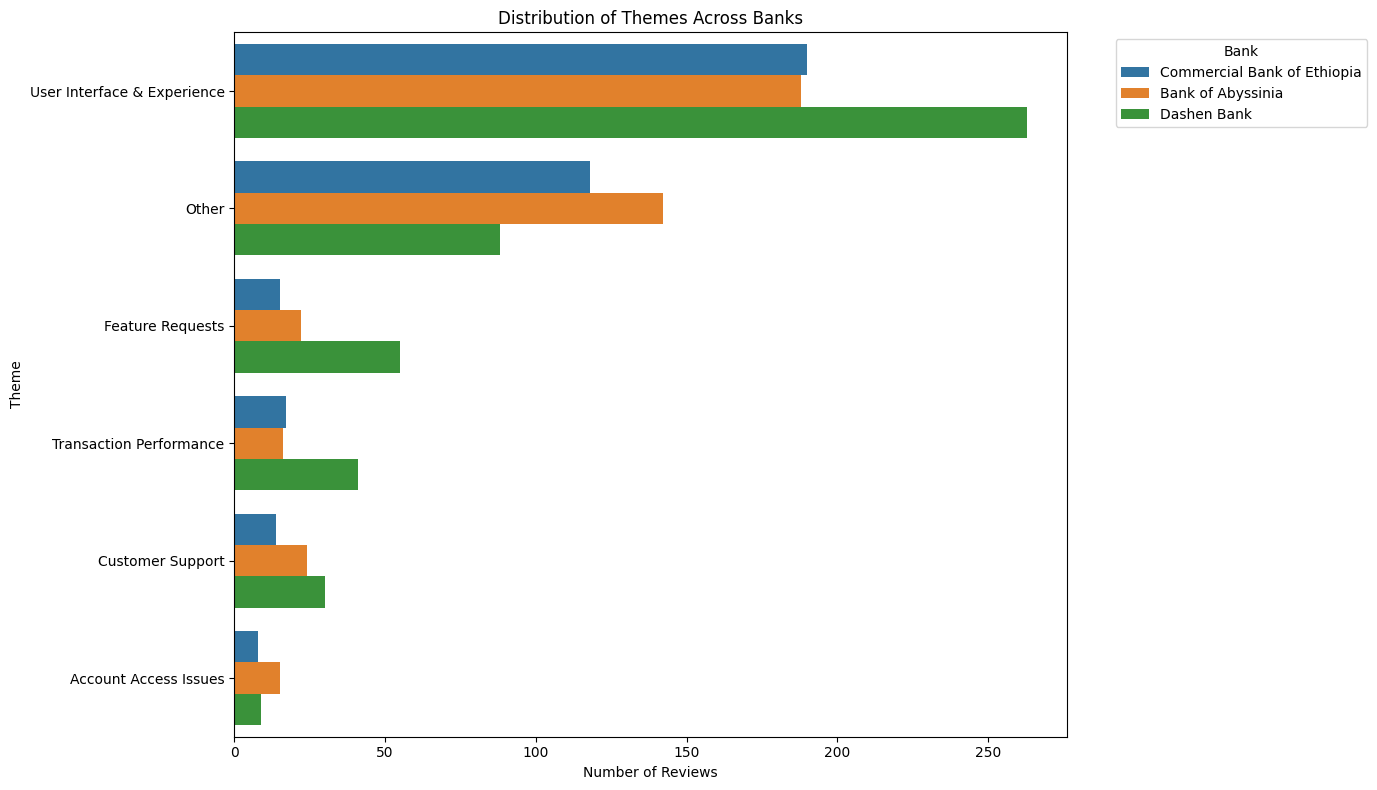


Theme Counts by Bank:
theme                        Account Access Issues  Customer Support  \
bank                                                                   
Bank of Abyssinia                               15                24   
Commercial Bank of Ethiopia                      8                14   
Dashen Bank                                      9                30   

theme                        Feature Requests  Other  Transaction Performance  \
bank                                                                            
Bank of Abyssinia                          22    142                       16   
Commercial Bank of Ethiopia                15    118                       17   
Dashen Bank                                55     88                       41   

theme                        User Interface & Experience  
bank                                                      
Bank of Abyssinia                                    188  
Commercial Bank of Ethiopia      

In [9]:
# Explode themes and count for each bank
themes_by_bank = df.assign(theme=df['identified_theme(s)'].str.split(', ')).explode('theme')

plt.figure(figsize=(14, 8))
sns.countplot(y='theme', hue='bank', data=themes_by_bank,
              order=themes_by_bank['theme'].value_counts().index,
              palette='tab10') # You can choose a different palette if you like
plt.title('Distribution of Themes Across Banks')
plt.xlabel('Number of Reviews')
plt.ylabel('Theme')
plt.legend(title='Bank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nTheme Counts by Bank:")
print(themes_by_bank.groupby('bank')['theme'].value_counts().unstack(fill_value=0))

## Keyword Clouds

Word clouds visually represent the most frequent words in the review text, providing a quick overview of common topics and concerns. We'll generate one for all reviews and then for each bank.

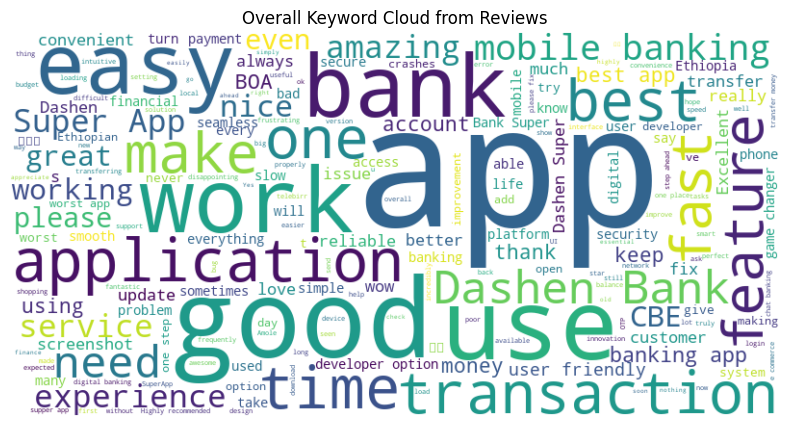

In [11]:
# Generate a word cloud for all reviews
all_reviews_text = ' '.join(df['review_text'].dropna().astype(str)) # <--- Changed 'review' to 'review_text'

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Keyword Cloud from Reviews')
plt.show()

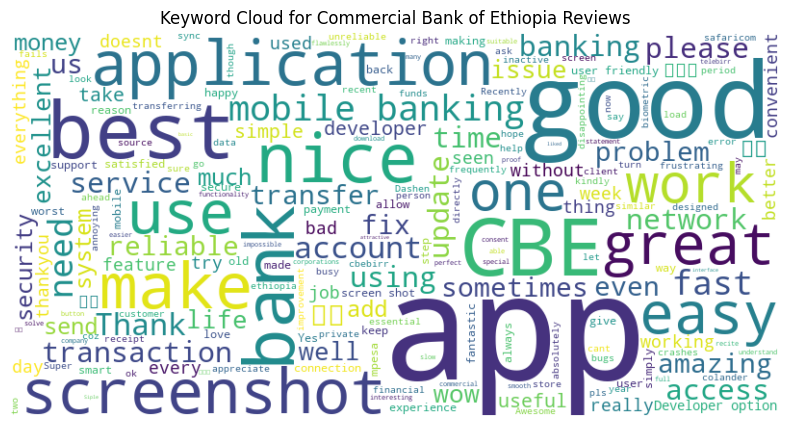

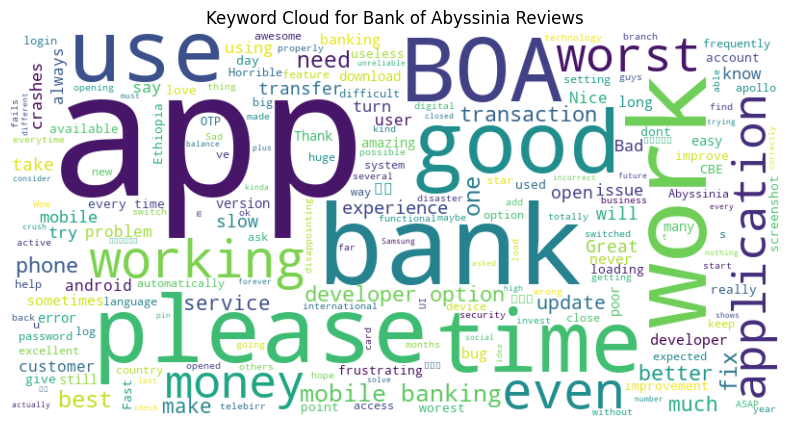

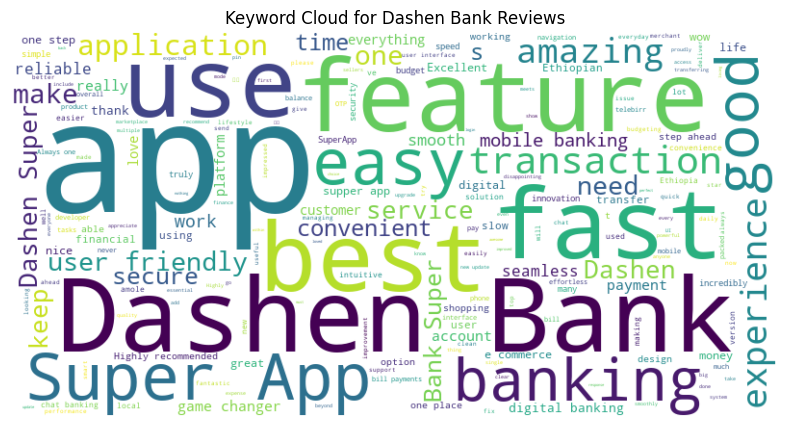

In [12]:
# Generate word clouds for each bank
banks = df['bank'].unique()
for bank in banks:
    bank_reviews_text = ' '.join(df[df['bank'] == bank]['review_text'].dropna().astype(str)) # <--- Changed 'review' to 'review_text'
    if bank_reviews_text: # Ensure there is text to generate word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bank_reviews_text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Keyword Cloud for {bank} Reviews')
        plt.show()
    else:
        print(f"No reviews found for {bank} to generate word cloud.")

In [13]:
# Analyze average sentiment for each theme
print("Average Sentiment Score by Theme (Higher is more positive):")
print(df.assign(theme=df['identified_theme(s)'].str.split(', ')).explode('theme')
      .groupby('theme')['sentiment_score'].mean().sort_values(ascending=False))

# Identify themes with predominantly negative sentiment (pain points)
print("\nThemes with Average Negative Sentiment Scores (Potential Pain Points):")
print(df.assign(theme=df['identified_theme(s)'].str.split(', ')).explode('theme')
      .groupby('theme')['sentiment_score'].mean().sort_values(ascending=True).head(5))

# Identify themes with predominantly positive sentiment (drivers)
print("\nThemes with Average Positive Sentiment Scores (Potential Drivers):")
print(df.assign(theme=df['identified_theme(s)'].str.split(', ')).explode('theme')
      .groupby('theme')['sentiment_score'].mean().sort_values(ascending=False).head(5))

Average Sentiment Score by Theme (Higher is more positive):
theme
User Interface & Experience    0.295958
Customer Support               0.150214
Feature Requests              -0.019504
Transaction Performance       -0.055867
Other                         -0.116127
Account Access Issues         -0.414032
Name: sentiment_score, dtype: float64

Themes with Average Negative Sentiment Scores (Potential Pain Points):
theme
Account Access Issues     -0.414032
Other                     -0.116127
Transaction Performance   -0.055867
Feature Requests          -0.019504
Customer Support           0.150214
Name: sentiment_score, dtype: float64

Themes with Average Positive Sentiment Scores (Potential Drivers):
theme
User Interface & Experience    0.295958
Customer Support               0.150214
Feature Requests              -0.019504
Transaction Performance       -0.055867
Other                         -0.116127
Name: sentiment_score, dtype: float64
